In [1]:
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import os
from scipy.optimize import curve_fit
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from GalPop import *
from tqdm.notebook import tqdm

In [2]:
### SET DATA LIMITS ###
IRAC_lim = 26
ra_range = (149.6, 150.52)  
dec_range = (1.74, 2.73)
z_range = (2., 3.)

# Assign Peaks to C20p

In [4]:
### LOAD DATA ###
# Cosmos data
cosmos = fits.open(r"C:\Users\sikor\OneDrive\Desktop\BigData\COSMOS2020\COSMOS2020_CLASSIC_R1_v2.0.fits")
c20p = cosmos[1].data

# MC iterations
MCp = np.load(r"C:\Users\sikor\OneDrive\Desktop\BigData\COSMOS2020\C20_MC_250_0_redo.npy")

## Interpolated sigma cube
sig_cube = fits.open(r"C:\Users\sikor\OneDrive\Desktop\benpy\ThirdTry\Hyperion_interpolated_cube_sigma.fits")

## Path for folders with .dat sigma files
sigPath = r"C:\Users\sikor\OneDrive\Desktop\benpy\HyperionPeaks"

print(f"Cosmos catalog = {np.shape(c20p)}")
print(f"MCs = {np.shape(MCp)}")

Cosmos catalog = (1720700,)
MCs = (1720700,)


In [5]:
## CUT DATA TO POTENTIALLY USABLE ##
g_idxs = np.where((c20p["ALPHA_J2000"] >= ra_range[0]) & (c20p["ALPHA_J2000"] <= ra_range[1])       # RA
                & (c20p["DELTA_J2000"] >= dec_range[0]) & (c20p["DELTA_J2000"] <= dec_range[1])     # DEC
                & ((c20p["IRAC_CH1_MAG"] <= IRAC_lim) | (c20p["IRAC_CH2_MAG"] <= IRAC_lim)) # IRAC
                & ((c20p["lp_type"] == 0) | (c20p["lp_type"] == 2)))        # LePhare type

c20p = c20p[g_idxs] # cosmos photometry
MCp = MCp[g_idxs]   # MC iterations

print(f"Potentially good galaxies = {np.shape(MCp)}")

Potentially good galaxies = (367677,)


In [6]:
## PEAKS FOR ORIGINAL SAMPLE ##

sigs = [5.0, 4.0, 3.0, 2.0]
sig_path = sigPath
sig_sums = [f"\peaks_sig{s}.dat" for s in sigs]
sig_folders = [f"\sig{s}_peaks" for s in sigs]

# Create the galaxy coordinates for this iteration
gal_coords = np.c_[c20p["ALPHA_J2000"], c20p["DELTA_J2000"], MCp[f"lp_zPDF"]]

# Find good galaxies for this pop
g_idxs = np.where((gal_coords[:,2] >= z_range[0]) & (gal_coords[:,2] <= z_range[1]))


# Create an instance
gp = GalPop(c20p["ID"][g_idxs], gal_coords[g_idxs], c20p["lp_mass_med"][g_idxs], verbose=True)

# Assign the peaks
gp.assignPeaks(sigs, sig_cube, sig_path, sig_sums, sig_folders, overwrite=True)

# Save file
gp.saveFile(f"GalPops/c20p.npy")

Updating voxel assignments (self.voxels)
Finding peaks for sigma = 5.0
Finding peaks for sigma = 4.0
Finding peaks for sigma = 3.0
Finding peaks for sigma = 2.0


In [24]:
## Create GalPop Objects ##
mc_iter = 250     # Number of differnet redshifts to use
sigs = [5.0, 4.0, 3.0, 2.0]
sig_path = sigPath
sig_sums = [f"\peaks_sig{s}.dat" for s in sigs]
sig_folders = [f"\sig{s}_peaks" for s in sigs]


for m in range(mc_iter):
    if m%10==0: print(m)
    # Create the galaxy coordinates for this iteration
    gal_coords = np.c_[c20p["ALPHA_J2000"], c20p["DELTA_J2000"], MCp[f"MC_iter{m+1}"]]

    # Find good galaxies for this pop
    g_idxs = np.where((gal_coords[:,2] >= z_range[0]) & (gal_coords[:,2] <= z_range[1]))


    # Create an instance
    gp = GalPop(c20p["ID"][g_idxs], gal_coords[g_idxs], c20p["lp_mass_med"][g_idxs], verbose=False)

    # Assign the peaks
    gp.assignPeaks(sigs, sig_cube, sig_path, sig_sums, sig_folders, overwrite=True)

    # Save file
    gp.saveFile(f"GalPops/MC_{m}.npy")

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


ValueError: no field of name MC_iter250

In [21]:
cosmos = fits.open(r"C:\Users\sikor\OneDrive\Desktop\BigData\COSMOS2020\COSMOS2020_CLASSIC_R1_v2.0.fits")
c20p = cosmos[1].data
MCs = np.load(r"C:/Users/sikor/OneDrive/Desktop/BigData/COSMOS2020/C20spec_MC_1000.npy", allow_pickle=True)

c20_sgals = np.take(c20p, MCs["ID"]-1, axis=0)

In [22]:
g_idxs = np.where((c20_sgals["ALPHA_J2000"] >= ra_range[0]) & (c20_sgals["ALPHA_J2000"] <= ra_range[1])       # RA
                & (c20_sgals["DELTA_J2000"] >= dec_range[0]) & (c20_sgals["DELTA_J2000"] <= dec_range[1])     # DEC
                & ((c20_sgals["IRAC_CH1_MAG"] <= IRAC_lim) | (c20_sgals["IRAC_CH2_MAG"] <= IRAC_lim))) # IRAC


c20_sgals = c20_sgals[g_idxs] # cosmos photometry
MCs = MCs[g_idxs]   # MC iterations

print(MCs.shape)

(40298,)


In [24]:
# Create the galaxy coordinates for this iteration
for sample in ["zs", "zg"]:

    gal_coords = np.c_[c20_sgals["ALPHA_J2000"], c20_sgals["DELTA_J2000"], MCs[sample]]

    # Find good galaxies for this pop
    g_idxs = np.where((gal_coords[:,2] >= z_range[0]) & (gal_coords[:,2] <= z_range[1]))


    # Create an instance
    gp = GalPop(c20_sgals["ID"][g_idxs], gal_coords[g_idxs], c20_sgals["lp_mass_med"][g_idxs], verbose=True)

    # Assign the peaks
    gp.assignPeaks(sigs, sig_cube, sig_path, sig_sums, sig_folders, overwrite=True)

    # Save file
    gp.saveFile(f"GalPops_spec/{sample}.npy")

Updating voxel assignments (self.voxels)
Finding peaks for sigma = 5.0
Finding peaks for sigma = 4.0
Finding peaks for sigma = 3.0
Finding peaks for sigma = 2.0
Updating voxel assignments (self.voxels)
Finding peaks for sigma = 5.0
Finding peaks for sigma = 4.0
Finding peaks for sigma = 3.0
Finding peaks for sigma = 2.0


In [25]:
## Create GalPop Objects ##
mc_iter = 1000     # Number of differnet redshifts to use
sigs = [5.0, 4.0, 3.0, 2.0]
sig_path = sigPath
sig_sums = [f"\peaks_sig{s}.dat" for s in sigs]
sig_folders = [f"\sig{s}_peaks" for s in sigs]


# Create the galaxy coordinates for this iteration
for m in tqdm(range(mc_iter)):

    gal_coords = np.c_[c20_sgals["ALPHA_J2000"], c20_sgals["DELTA_J2000"], MCs[f"MC_iter{m}"]]

    # Find good galaxies for this pop
    g_idxs = np.where((gal_coords[:,2] >= z_range[0]) & (gal_coords[:,2] <= z_range[1]))


    # Create an instance
    gp = GalPop(c20_sgals["ID"][g_idxs], gal_coords[g_idxs], c20_sgals["lp_mass_med"][g_idxs], verbose=False)

    # Assign the peaks
    gp.assignPeaks(sigs, sig_cube, sig_path, sig_sums, sig_folders, overwrite=True)

    # Save file
    gp.saveFile(f"GalPops_spec/MC_{m}.npy")

  0%|          | 0/1000 [00:00<?, ?it/s]

In [4]:
tester = GalPop()
tester.loadFile("GalPops/MC_0.npy")

In [6]:
len(tester.ms)

60822

In [16]:
## Assign Peak numbers for given sigma thresholds ##

sigs = [5.0, 4.0, 3.0, 2.0]
sig_path = sigPath
sig_sums = [f"\peaks_sig{s}.dat" for s in sigs]
sig_folders = [f"\sig{s}_peaks" for s in sigs]

for gp in gal_pops:

    gp.assignPeaks(sigs, sig_cube, sig_path, sig_sums, sig_folders, overwrite=True)

Updating voxel assignments (self.voxels)
Finding peaks for sigma = 4.0
Finding peaks for sigma = 3.0
Finding peaks for sigma = 2.0


In [19]:
gal_pops[0].saveFile("galpopTest.npy")

In [4]:
gal_pops = []
g = GalPop()
g.loadFile("galpopTest.npy")
gal_pops.append(g)

In [5]:
### Create Sub populations ###
sigs = [4.0, 3.0, 2.0]
sig_path = sigPath
sig_sums = [f"\peaks_sig{s}.dat" for s in sigs]
sig_folders = [f"\sig{s}_peaks" for s in sigs]
sig_sums = ["\peaks_sig4.0.dat"] + sig_sums

keys = ["field", "o4", "o3", "o2"]
s_ranges = [[-99, 4.0], [4.0, np.inf], [3.0,np.inf], [2.0,np.inf]]
z_ranges = [[2.,3.]] + 3*[[2.45,2.55]]
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

for gp in gal_pops:
    for i, k in enumerate(keys):
        gp.subPop(k, s_ranges[i], 13., [2.45, 2.55], sig_path, sig_sums[i], sig_cube, cosmo = cosmo, plot="./testingPlots/")

In [6]:
print(gal_pops[0].vols)

{'field': 1088577.1812911765, 'o4': 6000.3796, 'o3': 24529.533100000004, 'o2': 139048.8584}


In [12]:
### Create SMFs ###
m_range = [9., 12.0, 0.5]
gal_pops[0].SMF(keys, m_range)

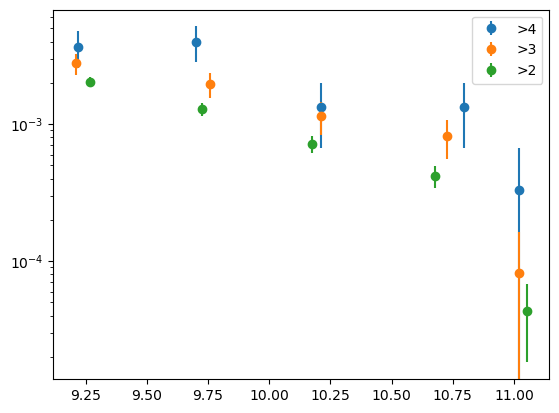

In [13]:
labels = [">4", ">3", ">2"]
gal_pops[0].SMF_plot(keys[1:], labels)